<a href="https://colab.research.google.com/github/seirah-yang/BootCamp/blob/main/RDS_%EC%A0%84%EB%A0%A5%EC%82%AC%EC%9A%A9%EB%9F%89%20LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pymysql

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 1.7 MB/s eta 0:00:00


In [ ]:
import pymysql
import pandas as pd
import pandas as pd
from sklearn.linear_model import LinearRegression
conn = pymysql.connect(
    host='database-1.cqrosuwe6n2q.us-east-1.rds.amazonaws.com',
    user='admin',
    password='qwer1234',
    database='solar_project',
    charset='utf8mb4'
)
query = "SELECT * FROM train;"
df = pd.read_sql(query, conn)
conn.close()

/tmp/ipython-input-2833180013.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
df.head(5)

,num,date_time,Pusage,temp,windP,humid,precip,sunlight,neceo,solarp
0,1,2020-06-01 00:00:00,8179.06,17.6,2.5,92,0.8,0.0,0,0
1,1,2020-06-01 01:00:00,8135.64,17.7,2.9,91,0.3,0.0,0,0
2,1,2020-06-01 02:00:00,8107.13,17.5,3.2,91,0.0,0.0,0,0
3,1,2020-06-01 03:00:00,8048.81,17.1,3.2,91,0.0,0.0,0,0
4,1,2020-06-01 04:00:00,8043.62,17.0,3.3,92,0.0,0.0,0,0


In [ ]:
df.columns

Index(['num', 'date_time', 'Pusage', 'temp', 'windP', 'humid', 'precip',
       'sunlight', 'neceo', 'solarp'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

X = df[['num','temp', 'windP', 'humid', 'precip', 'sunlight', 'neceo', 'solarp']]
y = df['Pusage']

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle = True)

In [ ]:
!pip install LinearRegression

In [ ]:
!pip install sklearn-model

In [ ]:
model = LinearRegression()

In [ ]:
# 모델 학습
model.fit(X, y)

LinearRegression()

In [ ]:
#예측
y_p = model.predict(X)

#가중치
print('가중치 a : ', model.coef_)
print('y절편 : ', model.intercept_)

#결정계수
relation_square = model.score(X, y)
print('결정계수 : ', relation_square)

가중치 a :  [ -9.32816312  77.99616444 119.46240967   5.73827405  -1.16819928
 330.86534605 639.02774273 480.5678842 ]
y절편 :  -738.2701918397597
결정계수 :  0.0737497582818415


/tmp/ipython-input-1291210198.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist = False, label = 'y실제')
/tmp/ipython-input-1291210198.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2 = sns.distplot(y_p, hist = False, label = 'y예측')


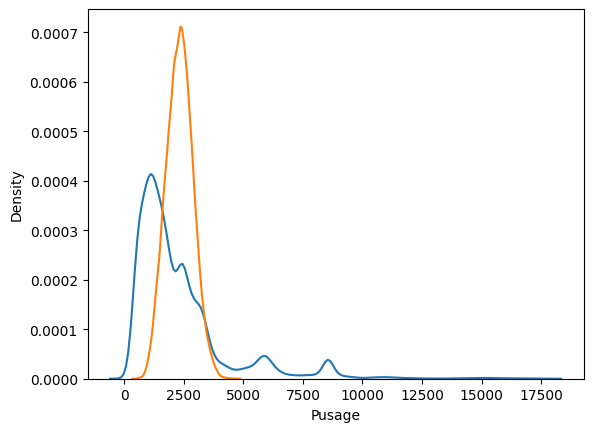

In [ ]:
#seaborn으로 나타내기
import seaborn as sns
ax1 = sns.distplot(y, hist = False, label = 'y실제')
ax2 = sns.distplot(y_p, hist = False, label = 'y예측')
plot.show()